# Part 10 - Data Visualization
by Kaan Kabalak @ witfuldata.com

Here comes the part where you take the first steps towards making your work count for people who are not as technical as you.
As a data professional, you will be able to have an idea about your data just by looking at some numbers. Here is the problem: The people you are going to work with will not understand what you get by those numbers. You need to make them see what you see. Data visualizations are the way to do that. 

Aside from that, it is often easier to understand your data through visuals rather than sheer numbers. We can therefore say that visualizations make things easier both for technical and non-technical professionals. 

In future parts we will go through customization of our charts and the integration of data visualization into topics like advanced statistical analysis and data modeling. 

Before we start, I want to explain something. Matplotlib is the main library for data visualization and several other data visualization libraries are based on it. However, matplotlib is not the best introduction to preparing charts with Python. Its syntax and the need for extra customization make it challenging and inefficient in terms of time. Seaborn, on the other hand, is a library that is based on Matplotlib, but takes care of many details so that we won't have to bother. Therefore, we shall start with Seaborn in this part and take a look at matplotlib in the future when we need extra control over our visualizations.



## Importing Libraries & Inspecting Our Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We will work with the automobile data set which we have seen in the previous chapters. However, here we will change the values of the origin column to actual region names. Also, just like in the previous parts, do not forget to set na_values to '?' to avoid turning them the columns into string objects (as explained in detail in the beginning of part 8)

In [2]:
auto_df = pd.read_csv("auto-mpg.csv", na_values= '?')
auto_df.origin.replace({1:'USA', 2:'Europe', 3:'Asia'}, inplace=True)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


## Histogram
Histograms are used to see how frequent the values are observed in our data. 

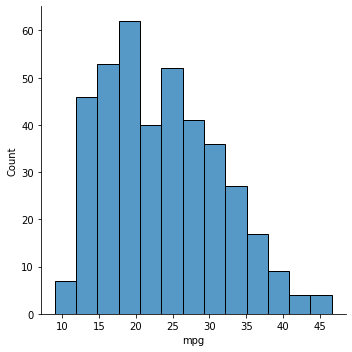

In [3]:
sns.displot(x=auto_df.mpg ,kind ="hist")
plt.show() # This must be used to properly show the visualization

The mpg on the x-axis shows all mpg values divided into certain ranges. In the context of data viz, these ranges are called bin ranges. Bins are the wide blue lines you see on the figure. They all represent a range of values.  

Count on the y-axis shows how many times values between a certain range ocurred in our data. The higher the blue bins, the more we observe the range of values.

For example, we can see from this viz that mpg values between the 15-20 range were observed around 110-120 times. How can we understand this? If you look at the graphic you will see that the there are two bins between the values of 15 and 20. One of them goes up to around 50 and the other is a bit above 60. When you add them together, you'll get a result around 110-120.

We can also understand from here that there were a few mpg values under 12-13 and above 40. The height of the blue bins are low around those ranges. 


## Barplot

Barplot show how the range of values of a numeric variable are observed based on the values of a categoric variable.

In the example below, we can see the mpg values by regions of origin. 

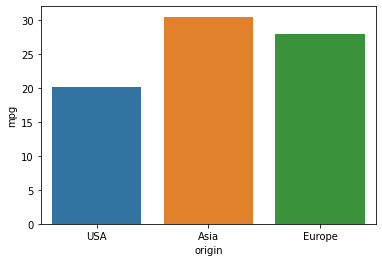

In [4]:
# Bar chart
sns.barplot(x=auto_df.origin, y=auto_df.mpg, ci = None) # Do not show confidence interval
plt.show()

## Scatter Plot

Scatter plots are used to visualize the relation between numerical (often continuous numeric) variables. They work like this:

You take two variables.

You draw an axis for each one (x and y)

You take an observed value from the x variable . 

Then, you take an observed value from the y variable 

You put dots on the points where their values meet (the blue dots in the graph)

What will this show us?

Well, as the x variable goes right its values increase. As the y variable goes up, its values increase.

This means:

* A dot is on the right, it is high = high x, high y values
* A dot is on the right, it is low = high x, low y values
* A dot is on the left, it is high = low x, high y values
* A dot is on the left, it is low = low x, low y values

If the x and y are low or high at the same, it means that there is a correlation between them. We use these dots on the scatterplot to visualize this correlation. 

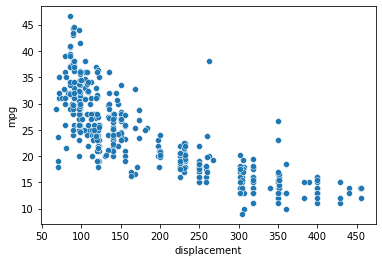

In [5]:
sns.scatterplot(x=auto_df.displacement, y= auto_df.mpg)
plt.show()

From this graph we can see that the mpg performance tends to decrease as engine displacement increases. 

## Correlation Heatmap

As the name suggests, the correlation heatmap shows the correlation between variables in accordance with the Pearson Correlation Coefficient. 

The interpretation of the correlation heatmap depends on the color map you will choose. In the example below, the Red-Blue ('RdBu') color map is used.



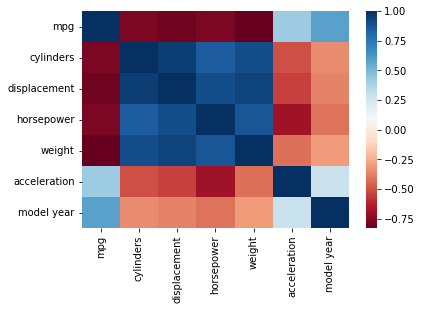

In [6]:
sns.heatmap(auto_df.corr(), cmap='RdBu')
plt.show()

In this graph, the darker blue squares indicate a strong positive correlation while the darker red square indicate a strong negative correlation.    

## Boxplot 

Boxplots show the distribution of variables. It is more detailed than histograms which also show distributions. They show:

* The minimum value that is not an outlier
* The maximum value maximum value that is not an outlier
* The outliers
* 25th, 50th (median) and the 75th percentiles



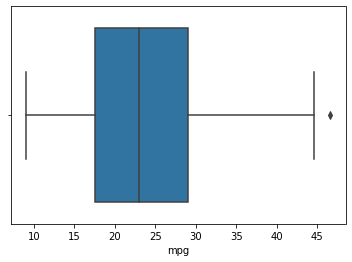

In [7]:
sns.boxplot(x=auto_df.mpg)
plt.show()

In this graph:

* The whisker on the left represents the minimum value that is not an outlier
* The left edge of the box represents the 25th percentile (the value larger than %25 of all values)
* The line in the middle of the box represent the 50th percentile (the median)
* The right edge of the box represents the 75th percentile (the value larger than %75 of all values)
* The whisker on the right represents the maximum value that is not an outlier
* The black dot on the right of the right whisker represents the outlier value(s)



#### Boxplots with two variables

It is possible to see how the values of a numeric variable are distributed based on the values of a categorical variable. In the example below, we can see the distribution of mpg rates based on regions of origin.

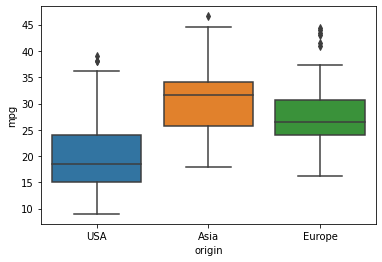

In [8]:
sns.boxplot(x=auto_df.origin, y=auto_df.mpg)
plt.show()

Everything is the same as the boxplot we have seen with a single variable. The only thing different is that now our boxplots are positioned vertically. 

## Violinplot

Violinplots, like boxplots, show distributions of variables. However, violinplots are considered to be more effective and detailed. Let's see a violinplot for the distribution of the mpg variable:

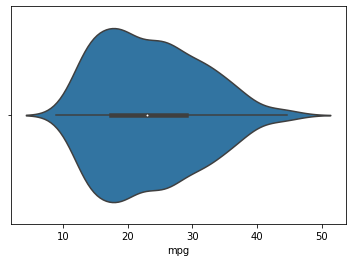

In [9]:
sns.violinplot(x=auto_df.mpg)
plt.show()

In this graph:

* The blue area shows the density of values. Thicker parts of the area mean that more values were observed. Here, we see that most mpg values are between 15-35
* The black box and its lines on right and left are interpreted like a boxplot. The only difference is that the lines are not cut out with whiskers.
* The white dot in the middle of the box is the median of the data



#### Violinplots for two variables

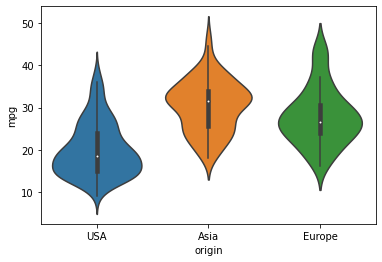

In [10]:
sns.violinplot(x=auto_df.origin, y=auto_df.mpg)
plt.show()

Everything is the same as the violinplot we have seen with a single variable. The only thing different is that now our violinplots are positioned vertically. 